In [153]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data/coffees.csv")

In [154]:
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [155]:
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [156]:
data.iloc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [157]:
print(type(data.loc[2]))
print(type(data.iloc[2]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Difference between .loc and .iloc
loc = location bassed accessor 
iloc = integer lookup (index of the row in question)

In [158]:
print('Dataset length: \n')
print(len(data))

Dataset length: 

671


In [159]:
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2011-11-11 13:29:00,9134.0,Quentin
freq,1,2,367


Seems like there is some missing data: there are 671 rows but _coffees_ column only has 658 entries

In [160]:
data.coffees.isnull().head()

0    False
1    False
2    False
3     True
4    False
Name: coffees, dtype: bool

In [161]:
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


#### data[data.coffes.isnull()]
This helps to list out only those rows that have NaN listed in the coffees column (see the table produced above)

In [162]:
data.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

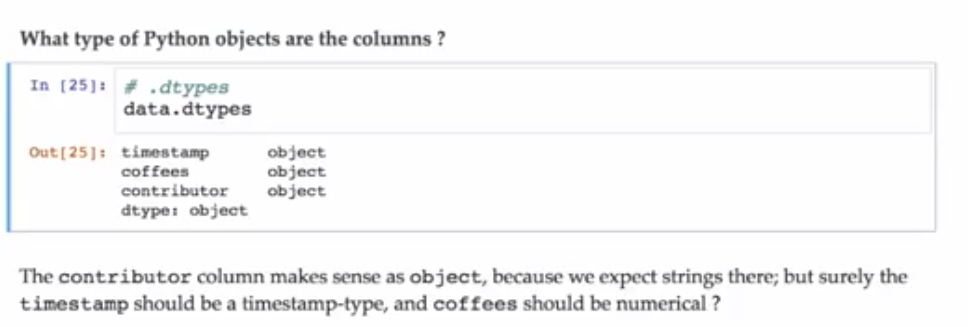

In [163]:
print(data.timestamp[0])
print(type(data.timestamp[0]))

2011-10-03 08:22:00
<class 'str'>


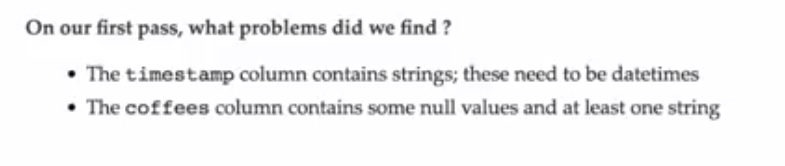

In [164]:
data.coffees = pd.to_numeric(data.coffees, errors='coerce')
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [165]:
data.dropna(inplace=True)
print(data.head())
print(data.dtypes)

             timestamp  coffees contributor
0  2011-10-03 08:22:00    397.0     Quentin
1  2011-10-04 11:48:00    410.0     Quentin
4  2011-10-05 10:47:00    464.0     Quentin
5  2011-10-05 13:15:00    481.0     Quentin
6  2011-10-06 07:21:00    503.0     Anthony
timestamp       object
coffees        float64
contributor     object
dtype: object


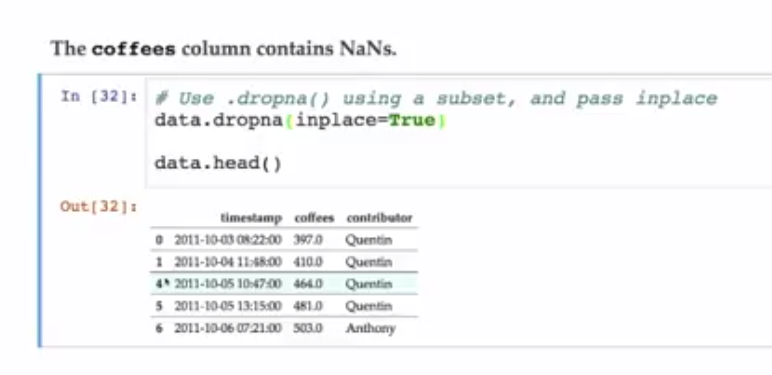
Notice the indices: they are dropped as well

In [166]:
data.coffees = data.coffees.astype(int)
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


In [167]:
# pd.to_datetime()
data.timestamp = pd.to_datetime(data.timestamp)
data.dtypes

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object

In [168]:
data.describe()

,coffees
count,657.000000
mean,8568.471842
std,4600.215049
min,397.000000
25%,4986.000000
50%,9172.000000
75%,11562.000000
max,24463.000000


In [169]:
data.iloc[:5]

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


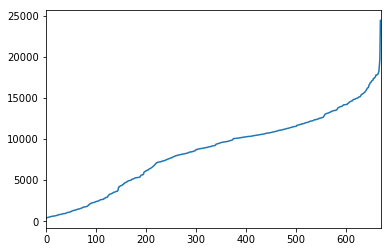

In [170]:
data.coffees.plot()
plt.show()
#note that this produces an x axis of indices, not datetime

In [171]:
#compare dateframe.plot to series.plot
data.plot(x=data.timestamp, style='.-') #style it with "dot dash"

In [172]:
data.timestamp < '2013-03-01'

0       True
1       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
       ...  
638     True
639     True
640     True
643     True
644     True
645     True
646     True
647     True
648     True
649     True
650     True
651     True
652     True
654     True
655     True
656     True
657     True
658     True
659     True
660    False
661    False
662    False
663    False
664    False
665    False
666    False
667    False
668    False
669    False
670    False
Name: timestamp, Length: 657, dtype: bool

In [173]:
#cut off the tail after 1 march 2013
data = data[data.timestamp < '2013-03-01']
data.plot(x=data.timestamp, style = '.-', figsize=(20, 4.5))


In [174]:
data.contributor.value_counts()

Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64

In [175]:
data.contributor.value_counts().plot(kind= 'bar')

#when we plot a series, we plot against its index, which in this case is our unique names
# hence, no need to pass an index value here

In [176]:
weekdays = data.timestamp.dt.weekday
data = data.assign(weekdays = weekdays)
data.head()


,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,0
1,2011-10-04 11:48:00,410,Quentin,1
4,2011-10-05 10:47:00,464,Quentin,2
5,2011-10-05 13:15:00,481,Quentin,2
6,2011-10-06 07:21:00,503,Anthony,3


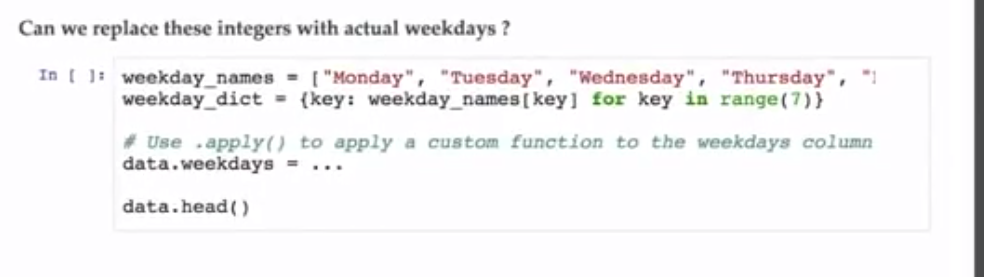

In [177]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_dict = {key: weekday_names[key] for key in range(7)}
weekday_dict

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [178]:
def day_of_week(idx):
    return weekday_dict[idx]

day_of_week(2)

'Wednesday'

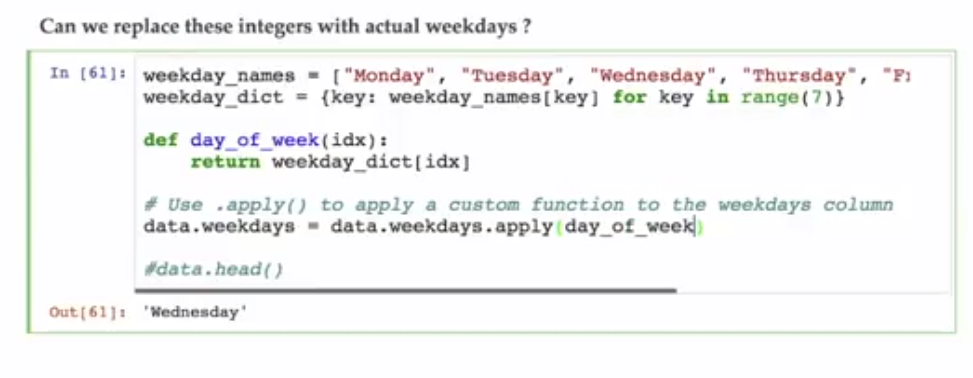

In [179]:
# pass those entries in the weekdays column into the function day_of_week
data.weekdays = data.weekdays.apply(day_of_week)
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


In [180]:
weekday_counts = data.groupby('weekdays').count()
weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Friday,114,114,114
Monday,145,145,145
Saturday,29,29,29
Sunday,13,13,13
Thursday,117,117,117
Tuesday,97,97,97
Wednesday,131,131,131


In [181]:
weekday_counts = data.groupby('weekdays').count()
weekday_counts = weekday_counts.loc[weekday_names]
weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


In [182]:
# plot something using the weekday_counts table above
weekday_counts.coffees.plot(kind='bar')

In [183]:
data.index

Int64Index([  0,   1,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            649, 650, 651, 652, 654, 655, 656, 657, 658, 659],
           dtype='int64', length=646)

In [184]:
data.index = data.timestamp
print(data.index)
print('\n', data.head())

DatetimeIndex(['2011-10-03 08:22:00', '2011-10-04 11:48:00',
               '2011-10-05 10:47:00', '2011-10-05 13:15:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               '2011-10-06 12:14:00', '2011-10-06 12:49:00',
               '2011-10-06 14:52:00', '2011-10-07 07:34:00',
               ...
               '2013-02-12 08:36:00', '2013-02-12 11:39:00',
               '2013-02-13 13:58:00', '2013-02-16 11:55:00',
               '2013-02-18 13:46:00', '2013-02-21 13:44:00',
               '2013-02-21 15:02:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', name='timestamp', length=646, freq=None)

                               timestamp  coffees contributor   weekdays
timestamp                                                              
2011-10-03 08:22:00 2011-10-03 08:22:00      397     Quentin     Monday
2011-10-04 11:48:00 2011-10-04 11:48:00      410     Quentin    Tuesday
2

In [185]:
# the timestamp column is no longer needed, because it is already coded into the index column
# axis = 1 means delete the column that contains the cell that we are searching for, not the row
# inplace = true implies data = data.drop(['timestamp'], axis = 1, inplace = True) in order to save some typing
data.drop(['timestamp'], axis=1, inplace = True)

In [186]:
data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,503,Anthony,Thursday


In [187]:
# add some rows at midnight on every day
# start at the first value of the index, end at last date, normalize = True means make these days to midnight
midnights = pd.date_range(data.index[0], data.index[-1], freq = 'D', normalize = True)
midnights

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

In [188]:
# FYI .loc returns something INSIDE the row, but INDEX is OUTSIDE the row
# Now we take the union of this date (daily 12  AM) index and new indices
# i.e. come up with a new index that has the values of these two indices and sort them in order
new_index = midnights.union(data.index)
new_index

DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1160, freq=None)

In [189]:
# now we re=index our dataframe with this new index

unsampled_data = data.reindex(new_index)
unsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,NaN,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


In [190]:
# for illustration
unsampled_data.fillna(9999).head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,9999.0,9999,9999
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,9999.0,9999,9999
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,9999.0,9999,9999
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,9999.0,9999,9999
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


In [191]:
# interpolate the unsampled+data using the interplate > time method
unsampled_data = unsampled_data.interpolate(method = 'time')
unsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Monday
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tuesday
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 10:47:00,464.000000,Quentin,Wednesday
2011-10-05 13:15:00,481.000000,Quentin,Wednesday
2011-10-06 00:00:00,494.066298,NaN,NaN
2011-10-06 07:21:00,503.000000,Anthony,Thursday
2011-10-06 10:04:00,513.000000,Quentin,Thursday


In [192]:
# resample the time at a daily frequency
# resample is similar to groupby, but that it creates the group itself
# groupby needs the user to create the groups himself

daily_data_asfreq = unsampled_data.resample('D').asfreq()
daily_data_mean = unsampled_data.resample('D').mean()
daily_data_count = unsampled_data.resample('D').count()
print(daily_data_asfreq.head())
print("\n", daily_data_mean.head())
print("\n", daily_data_count.head())

               coffees contributor weekdays
2011-10-03         NaN         NaN      NaN
2011-10-04  404.408262         NaN      NaN
2011-10-05  438.664249         NaN      NaN
2011-10-06  494.066298         NaN      NaN
2011-10-07  572.844311         NaN      NaN

                coffees
2011-10-03  397.000000
2011-10-04  407.204131
2011-10-05  461.221416
2011-10-06  525.344383
2011-10-07  603.263473

             coffees  contributor  weekdays
2011-10-03        1            1         1
2011-10-04        2            1         1
2011-10-05        3            2         2
2011-10-06        6            5         5
2011-10-07        7            6         6


In [193]:
#for the asfreq table, drop the contributor column (we no longer need it)
daily_data_asfreq_drop = daily_data_asfreq.drop(['contributor'], axis=1)
daily_data_asfreq_drop.head()

,coffees,weekdays
2011-10-03,NaN,NaN
2011-10-04,404.408262,NaN
2011-10-05,438.664249,NaN
2011-10-06,494.066298,NaN
2011-10-07,572.844311,NaN


In [194]:
#generate a column of weekday names
daily_data_asfreq_drop['weekdays'] = daily_data_asfreq_drop.index.weekday_name
daily_data_asfreq_drop.head()

,coffees,weekdays
2011-10-03,NaN,Monday
2011-10-04,404.408262,Tuesday
2011-10-05,438.664249,Wednesday
2011-10-06,494.066298,Thursday
2011-10-07,572.844311,Friday


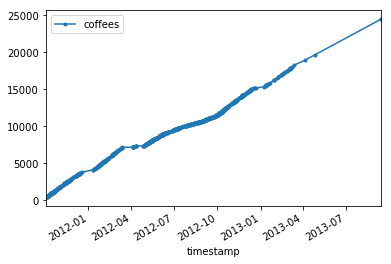

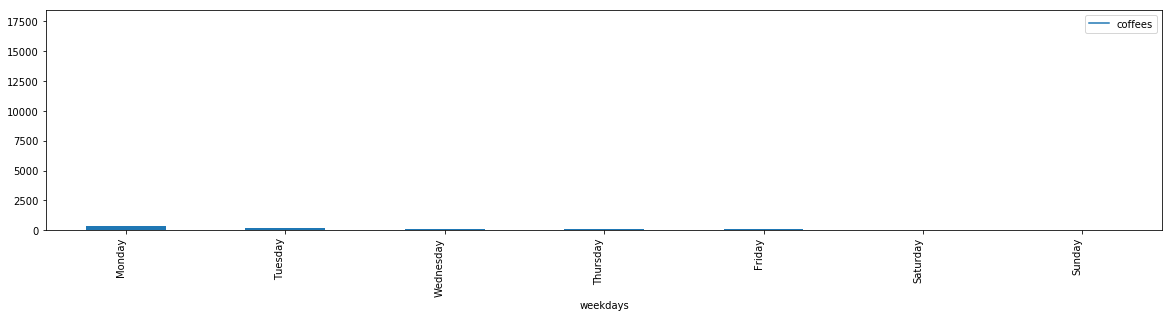

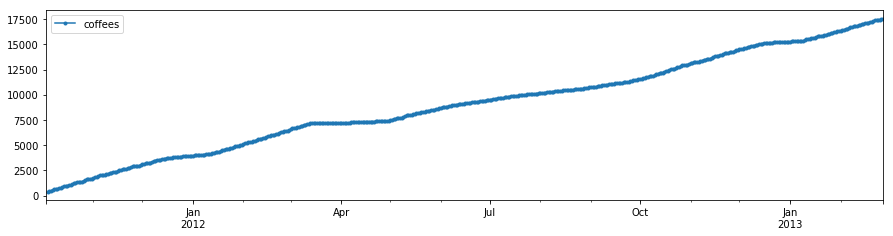

In [195]:
daily_data_asfreq_drop.plot(style=".-", figsize = (15,3.5))
plt.show()

### How many coffees are made on any given day?

In [196]:
# groupby weekday first, then take the mean, and 
# grab the coffees_made_today column
coffees_by_day =daily_data_asfreq_drop.groupby('weekdays').mean()
coffees_by_day

,coffees
weekdays,
Friday,9041.387848
Monday,9107.593954
Saturday,9075.525882
Sunday,9091.825740
Thursday,8997.887023
Tuesday,9027.274897
Wednesday,9066.407862


In [197]:
# Use .diff() on the coffees column, follow up with .shift()
coffees_made = daily_data_asfreq_drop.coffees.diff().shift(-1)
# Add as a column to the dataframe
daily_data_asfreq_drop["coffees_made_today"] = coffees_made
daily_data_asfreq_drop.head(20)

,coffees,weekdays,coffees_made_today
2011-10-03,NaN,Monday,NaN
2011-10-04,404.408262,Tuesday,34.255987
2011-10-05,438.664249,Wednesday,55.402049
2011-10-06,494.066298,Thursday,78.778013
2011-10-07,572.844311,Friday,64.392941
2011-10-08,637.237253,Saturday,7.492196
2011-10-09,644.729448,Sunday,8.195209
2011-10-10,652.924658,Monday,81.648549
2011-10-11,734.573206,Tuesday,46.351008
2011-10-12,780.924214,Wednesday,71.254295


In [198]:
# now group by weekdays, take the mean, 
# grab the coffees_made_today column
coffees_by_day = daily_data_asfreq_drop.groupby("weekdays").mean()
coffees_by_day

,coffees,coffees_made_today
weekdays,,
Friday,9041.387848,34.138034
Monday,9107.593954,37.802404
Saturday,9075.525882,16.299858
Sunday,9091.825740,15.768215
Thursday,8997.887023,43.500824
Tuesday,9027.274897,39.132964
Wednesday,9066.407862,47.640057


In [199]:
# order the series and then plot it
# sort coffees_by_day by list of weekend names
coffees_by_day = coffees_by_day.loc[weekday_names]
coffees_by_day

,coffees,coffees_made_today
weekdays,,
Monday,9107.593954,37.802404
Tuesday,9027.274897,39.132964
Wednesday,9066.407862,47.640057
Thursday,8997.887023,43.500824
Friday,9041.387848,34.138034
Saturday,9075.525882,16.299858
Sunday,9091.825740,15.768215


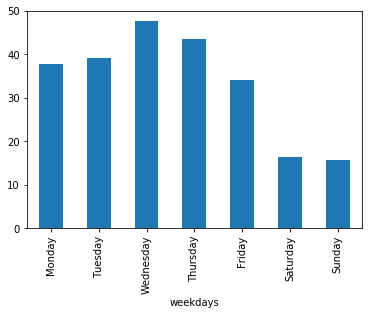

In [200]:
coffees_by_day['coffees_made_today'].plot(kind='bar')
plt.show()

### How many coffees did people drink?

In [201]:
# now pull in data on how many people were in the department (department_members.csv)
# make the first column the index, and parse the dates
people = pd.read_csv("data/department_members.csv", 
                     index_col = 'date', 
                     parse_dates=True)
print(people.head())
print("\n", people.index)


            members
date               
2011-08-31       12
2011-09-30       14
2011-10-31       14
2011-11-30       14
2011-12-31       15

 DatetimeIndex(['2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30',
               '2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31',
               '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31',
               '2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30',
               '2012-12-31', '2013-01-31', '2013-02-28'],
              dtype='datetime64[ns]', name='date', freq=None)


In [204]:
# do an outer join for datasets

daily_data_asfreq_drop = daily_data_asfreq_drop.join(people, how='outer').interpolate(method="nearest")
daily_data_asfreq_drop.head(20)

#without arguments the JOIN function will join on the index
# since the csv file has dates on 31 Aug and 30 Sep, but the daily_data_asfreq_drop file doesn't
# and the csv file is defined as the "inner" join, values that exist in the csv file that are absent in the daily_data... file
# will still be ported into the daily_data... file and given the value NaN for missing values


,coffees,weekdays,coffees_made_today,members
2011-08-31,NaN,NaN,NaN,12.0
2011-09-30,NaN,NaN,NaN,14.0
2011-10-03,NaN,Monday,NaN,14.0
2011-10-04,404.408262,Tuesday,34.255987,14.0
2011-10-05,438.664249,Wednesday,55.402049,14.0
2011-10-06,494.066298,Thursday,78.778013,14.0
2011-10-07,572.844311,Friday,64.392941,14.0
2011-10-08,637.237253,Saturday,7.492196,14.0
2011-10-09,644.729448,Sunday,8.195209,14.0
2011-10-10,652.924658,Monday,81.648549,14.0


In [206]:
# create a column for the number of coffees consumed per person
daily_data_asfreq_drop['coffees_per_person'] =  \
    daily_data_asfreq_drop.coffees_made_today / daily_data_asfreq_drop['members']
daily_data_asfreq_drop.head(10)

,coffees,weekdays,coffees_made_today,members,coffees_per_person
2011-08-31,NaN,NaN,NaN,12.0,NaN
2011-09-30,NaN,NaN,NaN,14.0,NaN
2011-10-03,NaN,Monday,NaN,14.0,NaN
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157
2011-10-09,644.729448,Sunday,8.195209,14.0,0.585372
2011-10-10,652.924658,Monday,81.648549,14.0,5.832039


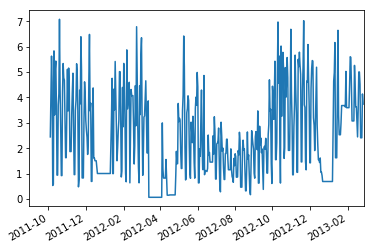

In [208]:
daily_data_asfreq_drop.coffees_per_person.plot()
plt.show() 

#### the spikes are due to weekends having near-zero coffee consumption. But what about the long flat lines? 
#### The coffee machine could have been broken

In [209]:
machine_status = pd.read_csv("data/coffee_status.csv",
                            index_col = 'date',
                            parse_dates = True)
machine_status.head()


,status
date,
2011-09-16,OK
2011-09-17,OK
2011-09-18,OK
2011-09-19,OK
2011-09-20,OK


In [210]:
# What values are in the status column?
machine_status.status.value_counts()

OK        514
BROKEN     88
Name: status, dtype: int64

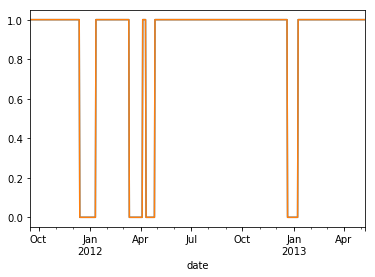

In [213]:
numerical_status = machine_status.status == 'OK'
numerical_status.plot()
plt.show()

In [214]:
# join the dataset on the date field
daily_data_asfreq_drop = daily_data_asfreq_drop.join(machine_status)
daily_data_asfreq_drop.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person,status
2011-08-31,NaN,NaN,NaN,12.0,NaN,NaN
2011-09-30,NaN,NaN,NaN,14.0,NaN,OK
2011-10-03,NaN,Monday,NaN,14.0,NaN,OK
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,OK
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,OK


In [215]:
daily_data_asfreq_drop['numerical_status'] = daily_data_asfreq_drop.status == 'OK'
daily_data_asfreq_drop.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person,status,numerical_status
2011-08-31,NaN,NaN,NaN,12.0,NaN,NaN,False
2011-09-30,NaN,NaN,NaN,14.0,NaN,OK,True
2011-10-03,NaN,Monday,NaN,14.0,NaN,OK,True
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,OK,True
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,OK,True


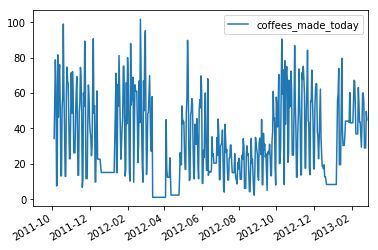

In [217]:
# plot both coffees per person and numerical status
daily_data_asfreq_drop[['status', 'coffees_made_today']].plot()
plt.show()

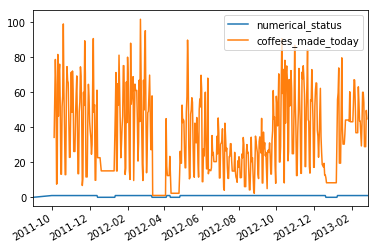

In [218]:
daily_data_asfreq_drop[['numerical_status', 'coffees_made_today']].plot()
plt.show()

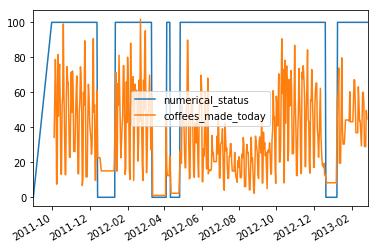

In [221]:
daily_data_asfreq_drop.numerical_status *= 100
daily_data_asfreq_drop[['numerical_status', 'coffees_made_today']].plot()
plt.show()

#### We see a strong weekday-weekend effect. Resampling weekly will fix that.

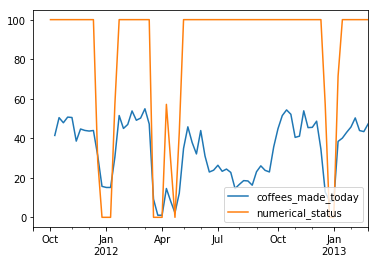

In [222]:
# Resample by taking the mean of each day
weekly_data = daily_data_asfreq_drop.resample('W').mean()
weekly_data[["coffees_made_today", "numerical_status"]].plot()
plt.show()